In [1]:
# is it possible to let a few layers of the pretrained network convolve over an input image
# and then look at the generated feature maps?

In [2]:
import numpy as np
import torch
import yaml
import json
import os, sys
import matplotlib.pyplot as plt

In [3]:
from distributed.model_util import choose_model, choose_old_model, load_model, extend_model_config
from distributed.util import q_value_index_to_action

In [4]:
model_name = "conv3d"
model_config_path_3d = "src/config/model_spec/conv_agents_slim.json"
trained_model_path_3d = "threshold_networks/5/69312/conv3d_5_69312.pt"

with open(model_config_path_3d, "r") as jsonfile:
    model_config_3d = json.load(jsonfile)[model_name]

code_size, stack_depth = 5, 5
syndrome_size = code_size + 1
model_config_3d = extend_model_config(model_config_3d, syndrome_size, stack_depth)
model_config_3d["network_size"] = "slim"
model_config_3d["rl_type"] = "q"

model3d = choose_old_model(model_name, model_config_3d)
model3d, *_ = load_model(model3d, trained_model_path_3d, model_device="cpu")

In [5]:
params = list(model3d.parameters())

In [6]:
w1 = params[0]
b1 = params[1]

w2 = params[2]
b2 = params[3]

w3 = params[4]
b3 = params[5]

w4 = params[6]
b4 = params[7]

w5 = params[8]
b5 = params[9]

In [7]:
import torch.nn.functional as F

# Measurement Error on Last Layer

In [8]:
stack_depth = 5
code_size = 5
syndrome_size = code_size + 1

state = torch.zeros((1, 1, stack_depth, syndrome_size, syndrome_size), dtype=torch.float32)
state[0, 0, :, 1, 2] = 1.0
state[0, 0, :, 2, 3] = 1.0
state[0, 0, -1, 1, 2] = 0.0
state[0, 0, -3, 2, 3] = 0.0

In [9]:
features1 = F.conv3d(state, w1, bias=b1, padding=1)
features2 = F.conv3d(features1, w2, bias=b2, padding=1)
features3 = F.conv3d(features2, w3, bias=b3, padding=1)
features4 = F.conv3d(features3, w4, bias=b4, padding=1)
features5 = F.conv3d(features4, w5, bias=b5, padding=1)

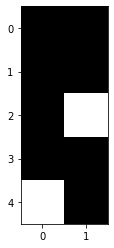

In [10]:
fig, ax = plt.subplots()

ax.imshow(
        np.hstack(
            (
                np.vstack(state[0, 0, :, 1, 2]),
                np.vstack(state[0, 0, :, 2, 3]),
            )
        ),
        vmin=0, vmax=1, cmap="Greys"
    )

### Layer 1

features_min=-2.3149178, features_max=0.7923707


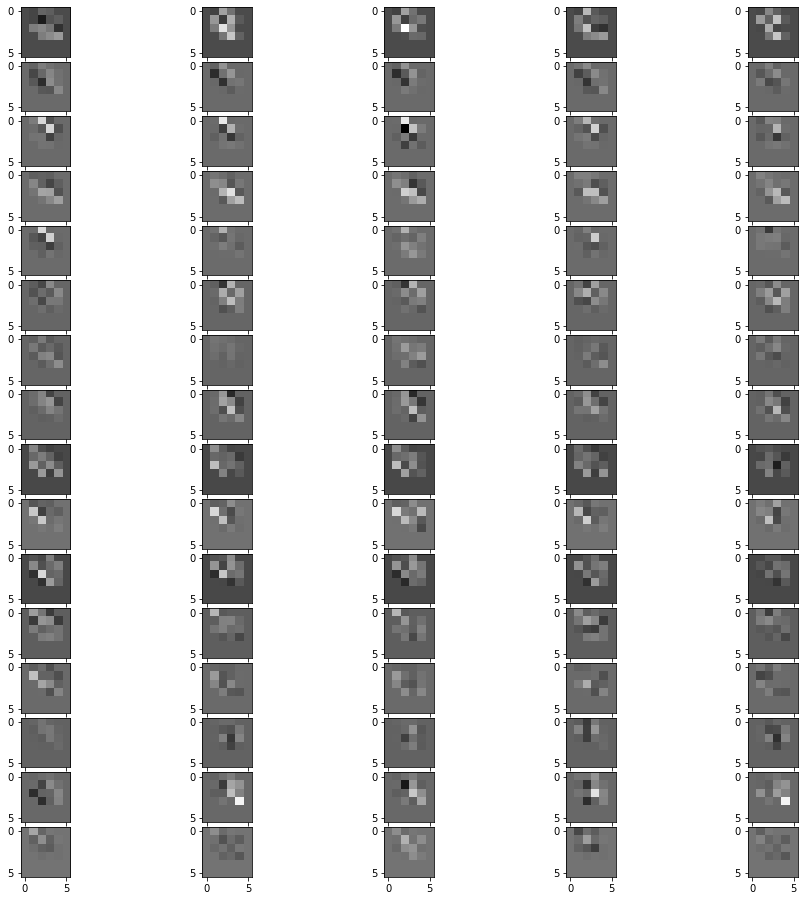

In [11]:
fig, ax = plt.subplots(16, stack_depth, figsize=(16,16), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

np_features = features1.detach().cpu().numpy()

features_max = np.max(np_features)
features_min = np.min(np_features)
print(f"{features_min=}, {features_max=}")

for i_filter in range(16):
    for j_layer in range(stack_depth):
        ax[i_filter, j_layer].imshow(
            np_features[0, 2*i_filter, j_layer],
            vmin=features_min,
            vmax=features_max,
            cmap="Greys"
        )

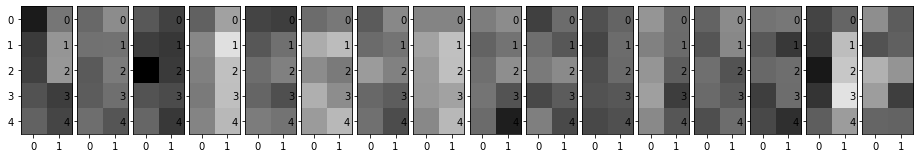

In [12]:
fig, ax = plt.subplots(1, 16, figsize=(16,16), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})


for i in range(16):
    ax[i].imshow(
            np.hstack(
                (
                    np.vstack(np_features[0, 2*i, :, 1, 2]),
                    np.vstack(np_features[0, 2*i, :, 2, 3]),
                )
            ),
            vmin=features_min, vmax=features_max, cmap="Greys"
        )

### Layer 5

features_min=-724260.8, features_max=43269.324


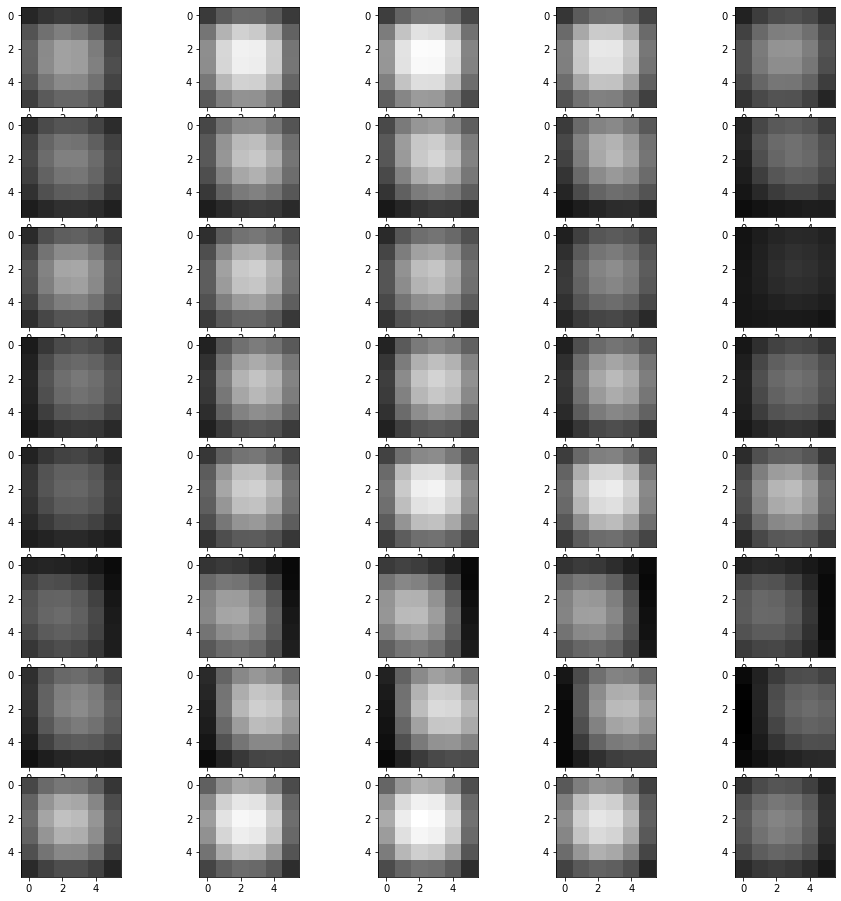

In [13]:
fig, ax = plt.subplots(8, stack_depth, figsize=(16,16), gridspec_kw={'wspace': 0.0, 'hspace': 0.1})

np_features = features5.detach().cpu().numpy()

features_max = np.max(np_features)
features_min = np.min(np_features)

print(f"{features_min=}, {features_max=}")

for i_filter in range(8):
    for j_layer in range(stack_depth):
        ax[i_filter, j_layer].imshow(
            np_features[0, i_filter, j_layer],
            vmin=features_min,
            vmax=features_max,
            cmap="Greys"
        )

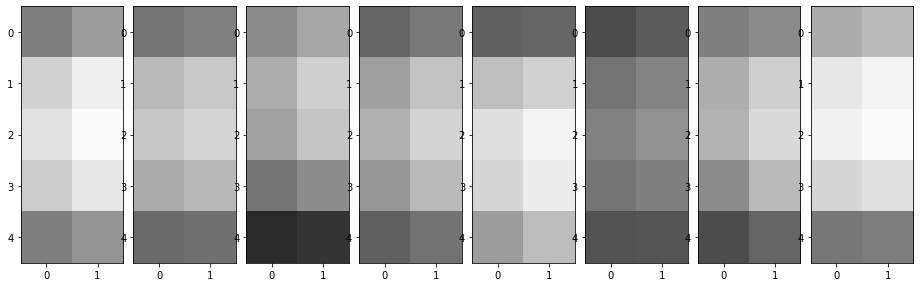

In [14]:
fig, ax = plt.subplots(1, 8, figsize=(16,16), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})


for i in range(8):
    ax[i].imshow(
            np.hstack(
                (
                    np.vstack(np_features[0, i, :, 1, 2]),
                    np.vstack(np_features[0, i, :, 2, 3]),
                )
            ),
            vmin=features_min, vmax=features_max, cmap="Greys"
        )

## No measurement error

### Layer 1

In [15]:
stack_depth = 5
code_size = 5
syndrome_size = code_size + 1

state = torch.zeros((1, 1, stack_depth, syndrome_size, syndrome_size), dtype=torch.float32)
state[0, 0, :, 1, 2] = 1.0
state[0, 0, :, 2, 3] = 1.0

In [16]:
features1 = F.conv3d(state, w1, bias=b1, padding=1)
features2 = F.conv3d(features1, w2, bias=b2, padding=1)
features3 = F.conv3d(features2, w3, bias=b3, padding=1)
features4 = F.conv3d(features3, w4, bias=b4, padding=1)
features5 = F.conv3d(features4, w5, bias=b5, padding=1)

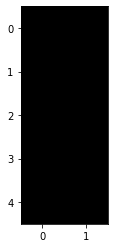

In [17]:
fig, ax = plt.subplots()

ax.imshow(
        np.hstack(
            (
                np.vstack(state[0, 0, :, 1, 2]),
                np.vstack(state[0, 0, :, 2, 3]),
            )
        ),
        vmin=0, vmax=1, cmap="Greys"
    )

### Layer 1

features_min=-2.032318, features_max=0.49798146


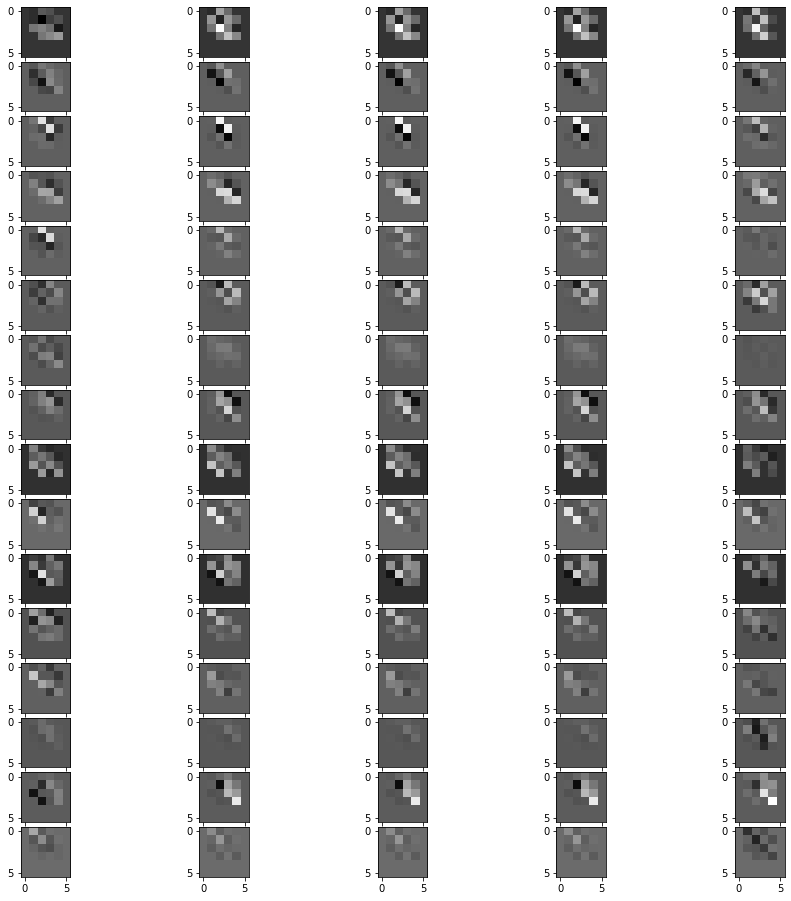

In [18]:
fig, ax = plt.subplots(16, stack_depth, figsize=(16,16), gridspec_kw={'wspace': 0.0, 'hspace': 0.1})

np_features = features1.detach().cpu().numpy()

features_max = np.max(np_features)
features_min = np.min(np_features)
print(f"{features_min=}, {features_max=}")

for i_filter in range(16):
    for j_layer in range(stack_depth):
        ax[i_filter, j_layer].imshow(
            np_features[0, 2*i_filter, j_layer],
            vmin=features_min,
            vmax=features_max,
            cmap="Greys"
        )

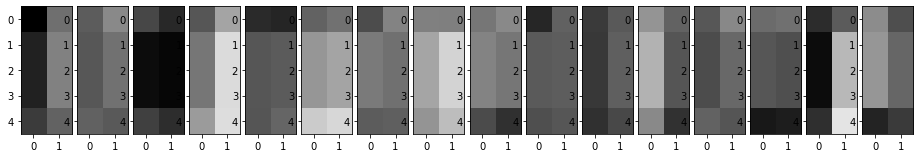

In [19]:
fig, ax = plt.subplots(1, 16, figsize=(16,16), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})


for i in range(16):
    ax[i].imshow(
            np.hstack(
                (
                    np.vstack(np_features[0, 2*i, :, 1, 2]),
                    np.vstack(np_features[0, 2*i, :, 2, 3]),
                )
            ),
            vmin=features_min, vmax=features_max, cmap="Greys"
        )

### Layer 5

features_min=-797892.4, features_max=48990.05


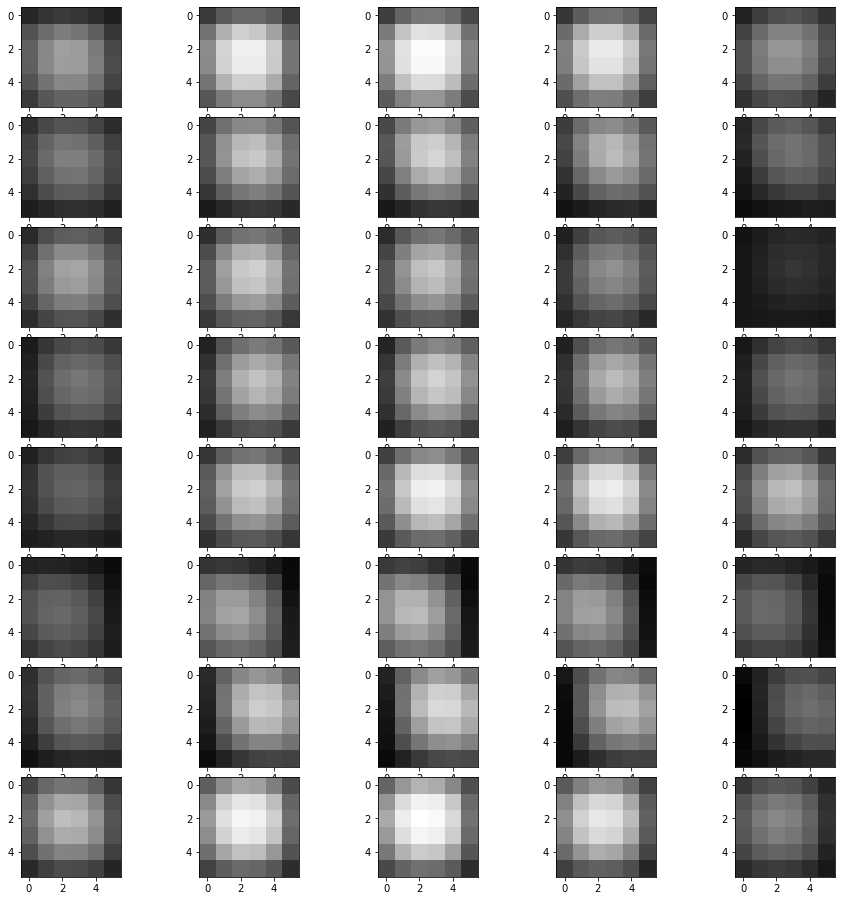

In [20]:
fig, ax = plt.subplots(8, stack_depth, figsize=(16,16), gridspec_kw={'wspace': 0.0, 'hspace': 0.1})

np_features = features5.detach().cpu().numpy()

features_max = np.max(np_features)
features_min = np.min(np_features)
print(f"{features_min=}, {features_max=}")


for i_filter in range(8):
    for j_layer in range(stack_depth):
        ax[i_filter, j_layer].imshow(
            np_features[0, i_filter, j_layer],
            vmin=features_min,
            vmax=features_max,
            cmap="Greys"
        )

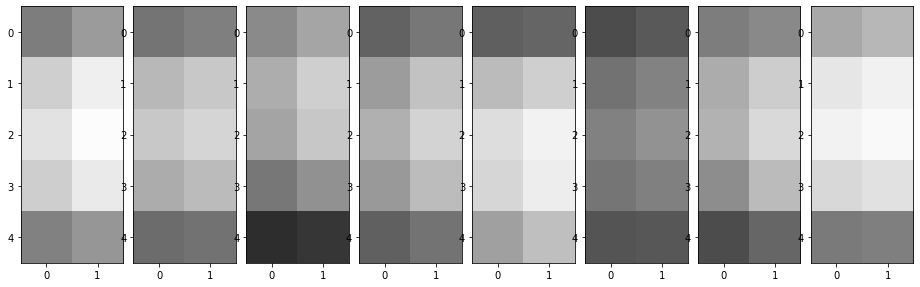

In [21]:
fig, ax = plt.subplots(1, 8, figsize=(16,16), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})


for i in range(8):
    ax[i].imshow(
            np.hstack(
                (
                    np.vstack(np_features[0, i, :, 1, 2]),
                    np.vstack(np_features[0, i, :, 2, 3]),
                )
            ),
            vmin=features_min, vmax=features_max, cmap="Greys"
        )